In [64]:
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import os, sys
import h5py
import numpy as np
from tqdm.notebook import tqdm
import torch
import pulser_diff

In [ ]:
sys.path.append("../../..") # root of the repository

In [ ]:
from source.model import run_model_2

In [38]:
test_data_path = Path("../../../data/MNIST_PCA4/mnist_pca4_test.h5")
with h5py.File(test_data_path, "r") as f:
    print(f.keys())
    X_test = f["X_pca"][:]
    y_test = f["y"][:]
n_test = 500 # per class
pca_components = 2
# we only use y==1 and y==5
X1_test = X_test[y_test == 1][:n_test]
X5_test = X_test[y_test == 5][:n_test]
X_test = np.concatenate((X1_test, X5_test), axis=0)[:, :pca_components]
y_test = np.concatenate((np.zeros(n_test), np.ones(n_test)), axis=0)

<KeysViewHDF5 ['X_pca', 'y']>


In [36]:
X_test.shape, y_test.shape

((1000, 4), (1000,))

In [2]:
path = Path("run_0.pickle")
with path.open("rb") as f:
    final_params = pickle.load(f)

In [113]:
for k in final_params.keys():
    if k == "positions":
        print(f"{k}: {final_params[k][-1, :]}")  # print last positions
    else:
        print(f"{k}: {final_params[k]}")

n_ancilliary_qubits: 0
sampling_rate: 0.4
local_pulse_duration: 50
global_pulse_duration: 50
embed_pulse_duration: 80
positions: tensor([[-3.6675,  0.0000],
        [ 3.6675,  0.0000]], grad_fn=<SliceBackward0>)
local_pulses_omega: tensor([0.7584, 0.9533], requires_grad=True)
local_pulses_delta: tensor([0.6863, 0.9544], requires_grad=True)
global_pulse_omega: 0.6789551973342896
global_pulse_delta: 0.5389003753662109
data_save_file: generated_data/2_pca_components/2_run/output.csv
protocol: wait-for-all
train_loss_hist: [0.5304614901542664, 0.8060855865478516, 0.7857792973518372, 0.7876716256141663, 0.695662260055542, 0.6250330805778503, 0.6695048213005066, 0.6074178218841553, 0.6049635410308838, 0.6021620035171509, 0.6032766103744507, 0.6135327219963074, 0.6183961629867554, 0.6120584607124329, 0.62318354845047, 0.5955316424369812, 0.5974999070167542, 0.6192249059677124, 0.5952534675598145, 0.5674790143966675, 0.579946756362915, 0.580405592918396, 0.5915279984474182, 0.5884405374526978,

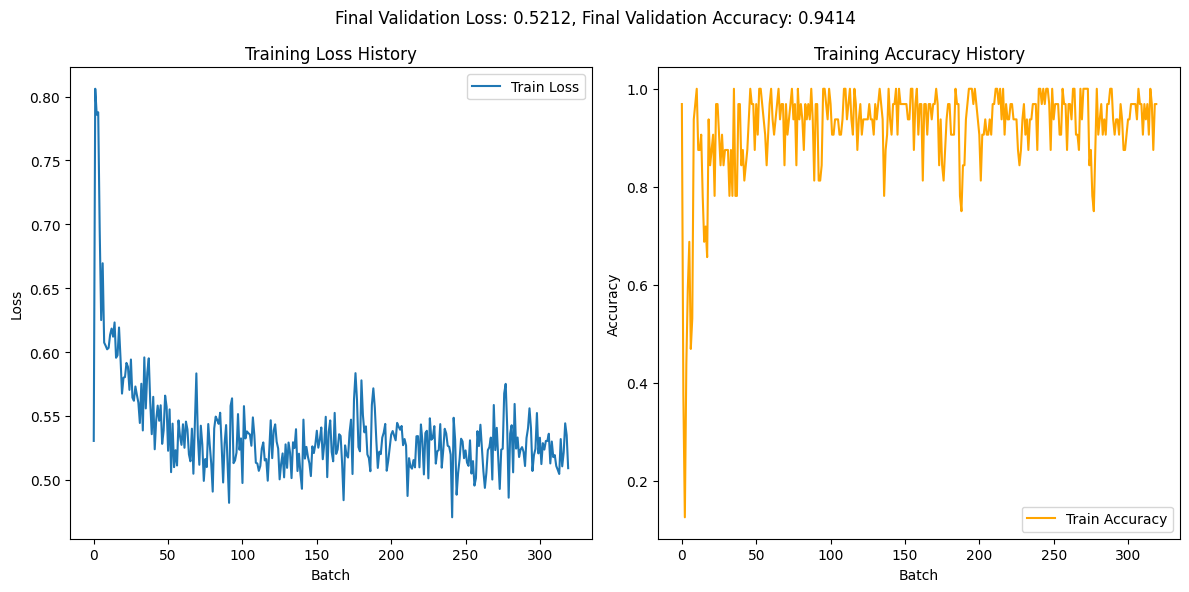

In [9]:
train_loss_hist = final_params["train_loss_hist"]
train_acc_hist = final_params["train_accuracy_hist"]
final_val_loss = final_params["val_loss"]
final_val_acc = final_params["val_accuracy"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(train_loss_hist, label="Train Loss")
ax[0].set_title("Training Loss History")
ax[0].set_xlabel("Batch")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[1].plot(train_acc_hist, label="Train Accuracy", color='orange')
ax[1].set_title("Training Accuracy History")
ax[1].set_xlabel("Batch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
plt.suptitle(f"Final Validation Loss: {final_val_loss:.4f}, Final Validation Accuracy: {final_val_acc:.4f}")
plt.tight_layout()
plt.show()

Running model with final parameters...
X_test[i]=array([0.05768351, 0.37785402], dtype=float32), y_test[i]=0.0


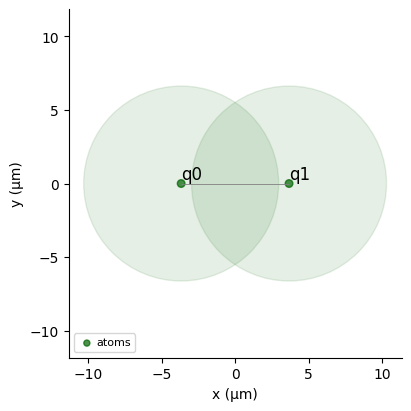

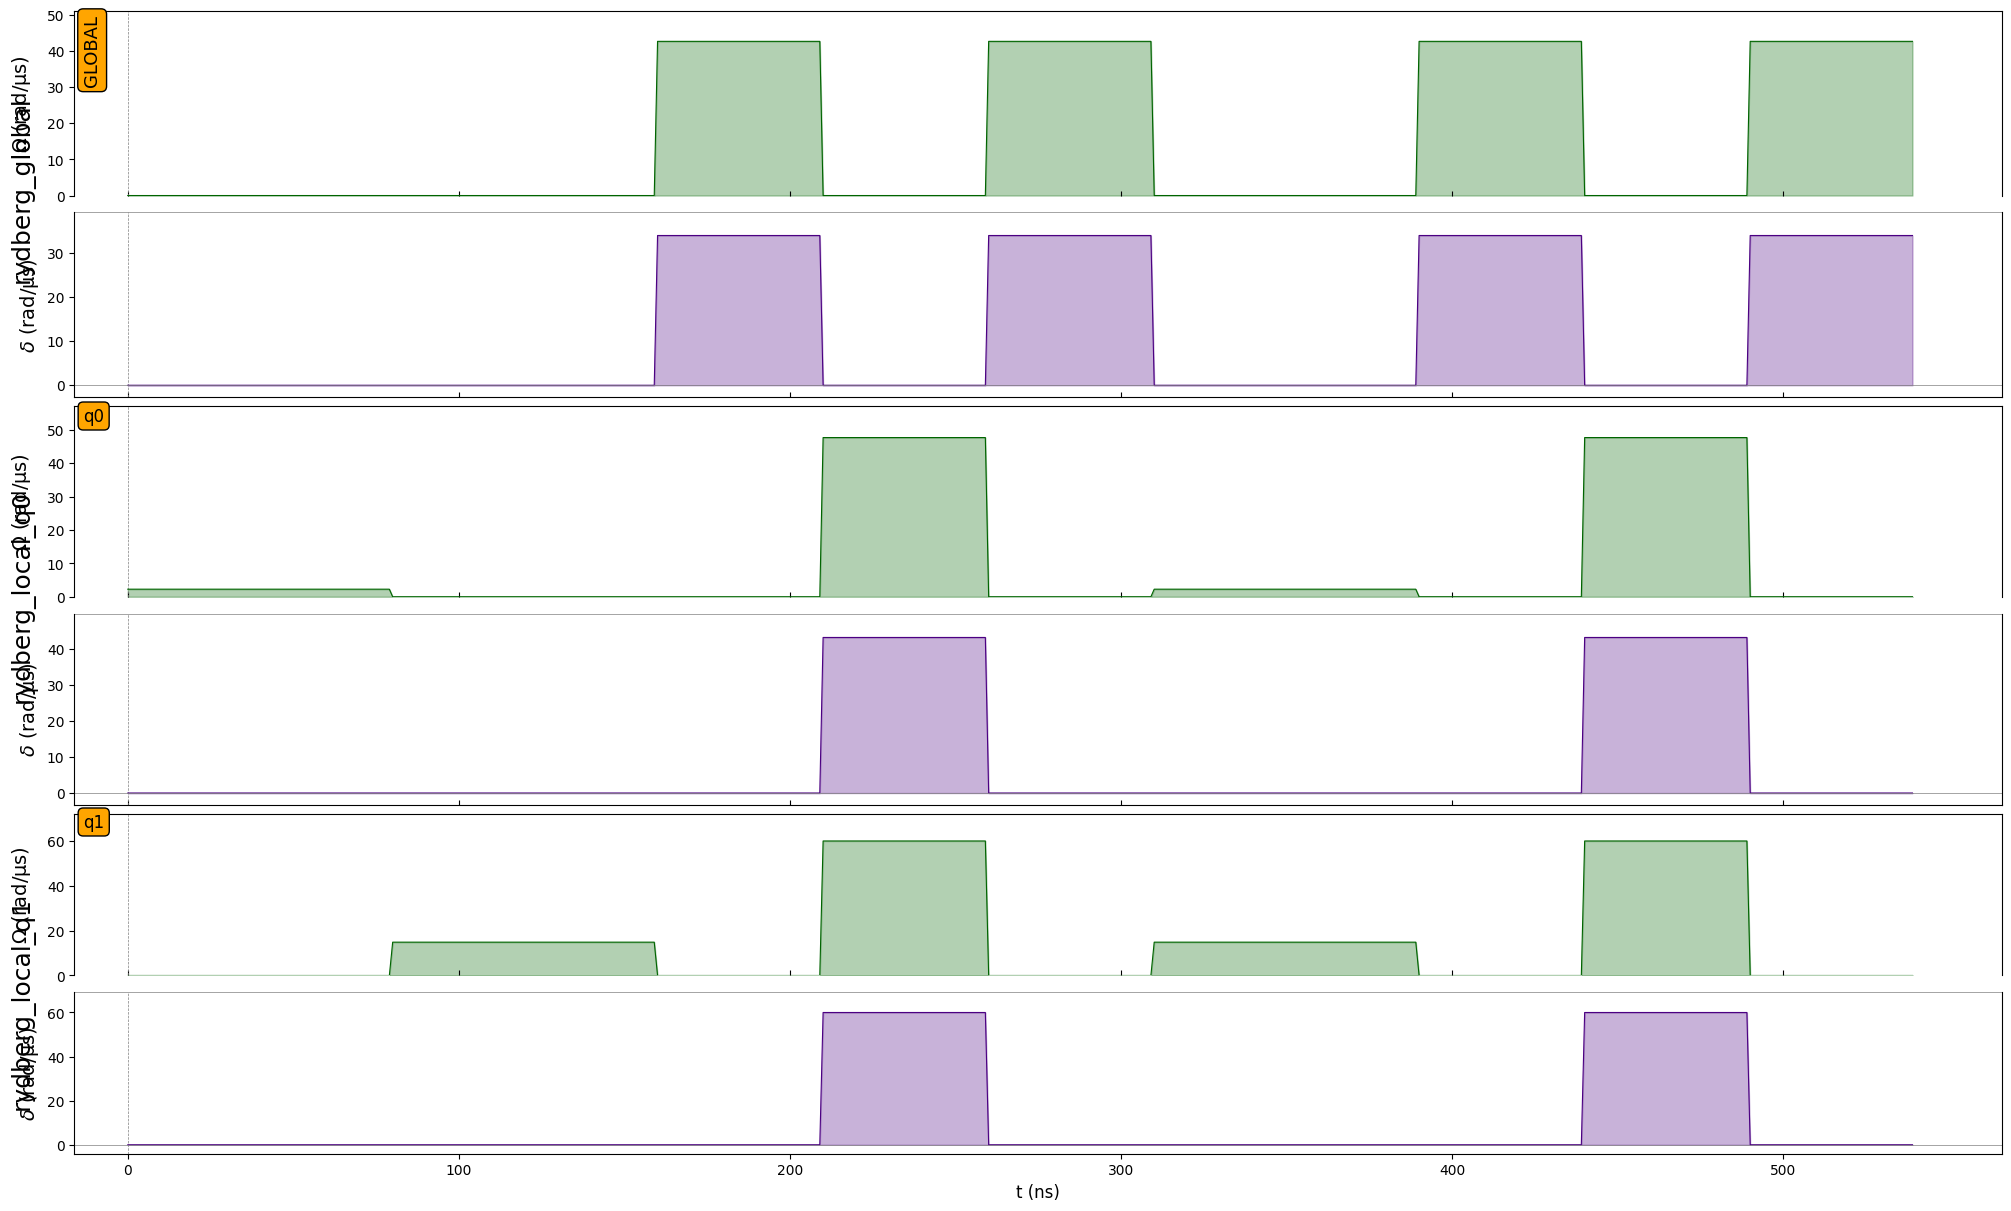

0

In [49]:
i = 2
print("Running model with final parameters...")
print(f"{X_test[i]=}, {y_test[i]=}")
run_model_2(
    x=X_test[i],
    local_pulses_omega=final_params["local_pulses_omega"],
    local_pulses_delta=final_params["local_pulses_delta"],
    global_pulse_omega=final_params["global_pulse_omega"],
    global_pulse_delta=final_params["global_pulse_delta"],
    positions=final_params["positions"][-1],
    global_pulse_duration=final_params["global_pulse_duration"],
    local_pulse_duration=final_params["local_pulse_duration"],
    embed_pulse_duration=final_params["embed_pulse_duration"],
    sampling_rate=final_params["sampling_rate"],
    protocol=final_params["protocol"],
    draw_reg_seq=True,
    draw_only=True,
)

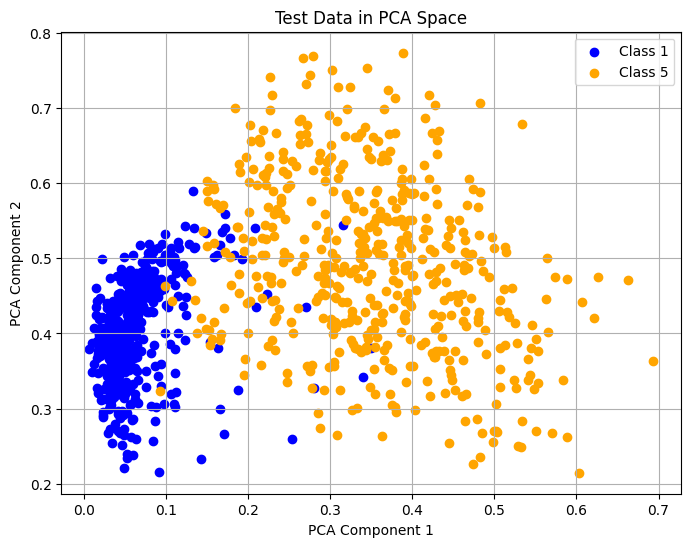

In [46]:
# plot X_test in 2D with colors based on y_test
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', label='Class 1')
plt.scatter(X_test  [y_test == 1, 0], X_test[y_test == 1, 1], color='orange', label='Class 5')
plt.title("Test Data in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# !! the final_params loaded from the file are wrong, I had saved them wrongly

# run the model on a grid of points in the PCA space
# x_min, x_max = 0.0, 1.0
# y_min, y_max = 0.0, 1.0
# n_grid = 20
# x_grid = np.linspace(x_min, x_max, n_grid)
# y_grid = np.linspace(y_min, y_max, n_grid)
# X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
# import time

# xy = []
# outputs = []
# print("Running model on grid of points...")
# for x, y in tqdm(zip(X_grid.flatten(), Y_grid.flatten()), total=n_grid**2):
#     with torch.no_grad():
#         out, states = run_model_2(
#             x=np.array([x, y]),
#             local_pulses_omega=final_params["local_pulses_omega"],
#             local_pulses_delta=final_params["local_pulses_delta"],
#             global_pulse_omega=final_params["global_pulse_omega"],
#             global_pulse_delta=final_params["global_pulse_delta"],
#             positions=final_params["positions"][-1],
#             global_pulse_duration=final_params["global_pulse_duration"],
#             local_pulse_duration=final_params["local_pulse_duration"],
#             embed_pulse_duration=final_params["embed_pulse_duration"],
#             sampling_rate=final_params["sampling_rate"],
#             protocol=final_params["protocol"],
#             draw_reg_seq=False,
#             draw_only=False,
#         )
#     xy.append((x, y))
#     outputs.append(out)
# xy = np.array(xy)
# outputs = np.array(outputs)[:, 0]

Running model on grid of points...


  0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
# run the model on a grid of points in the PCA space
# manually copy the final_params from the training run terminal output 
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0
n_grid = 50
x_grid = np.linspace(x_min, x_max, n_grid)
y_grid = np.linspace(y_min, y_max, n_grid)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
import time

xy = []
outputs = []
print("Running model on grid of points...")
for x, y in tqdm(zip(X_grid.flatten(), Y_grid.flatten()), total=n_grid**2):
    with torch.no_grad():
        out, states = run_model_2(
            x=np.array([x, y]),
            local_pulses_omega=torch.tensor([1.1559689 , 1.6583259 ]),
            local_pulses_delta=torch.tensor([-0.76122487,  1.5434982 ]),
            global_pulse_omega=torch.tensor(-0.26719406),
            global_pulse_delta=torch.tensor(1.0807998),
            positions=torch.tensor([[-3.6672354,  0.], [ 3.6672359,  0.]]),
            global_pulse_duration=final_params["global_pulse_duration"],
            local_pulse_duration=final_params["local_pulse_duration"],
            embed_pulse_duration=final_params["embed_pulse_duration"],
            sampling_rate=final_params["sampling_rate"],
            protocol=final_params["protocol"],
            draw_reg_seq=False,
            draw_only=False,
        )
    xy.append((x, y))
    outputs.append(out)
xy = np.array(xy)
outputs = np.array(outputs)[:, 0]

Running model on grid of points...


  0%|          | 0/2500 [00:00<?, ?it/s]

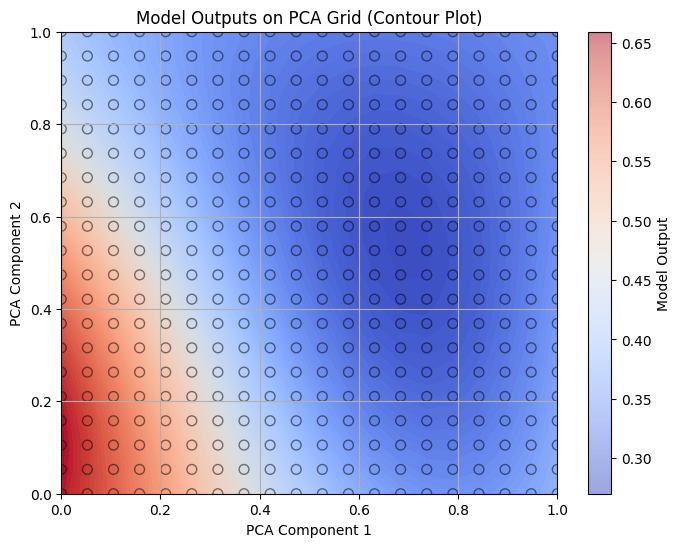

In [ ]:
# plot the outputs on the grid as a contour plot
plt.figure(figsize=(8, 6))
plt.tricontourf(xy[:, 0], xy[:, 1], outputs[:], levels=100, cmap='coolwarm')
plt.scatter(xy[:, 0], xy[:, 1], c=outputs, cmap='coolwarm', s=50, edgecolor='k', alpha=0.5)
plt.colorbar(label='Model Output')
plt.title("Model Outputs on PCA Grid (Contour Plot)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()

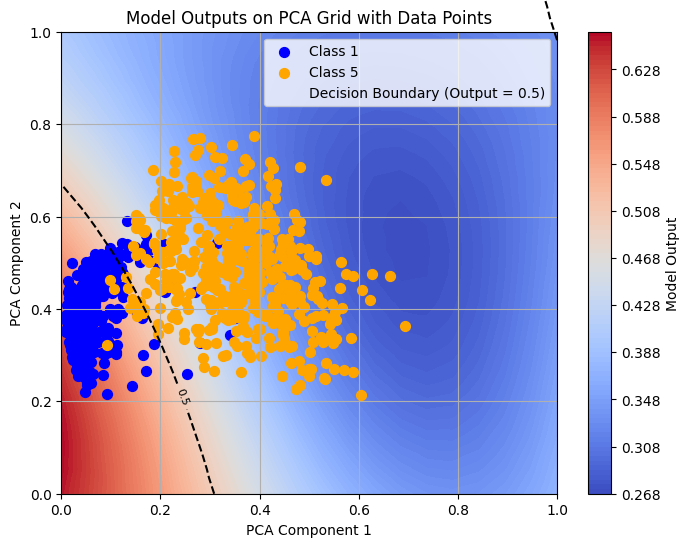

In [134]:
# contour plot as above, but with the actual data points overlaid
plt.figure(figsize=(8, 6))
plt.tricontourf(xy[:, 0], xy[:, 1], outputs[:], levels=100, cmap='coolwarm')
plt.colorbar(label='Model Output')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', label='Class 1', s=50)
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='orange', label='Class 5', s=50)
# contours for the decision boundary at output = 0.5
contours = plt.tricontour(xy[:, 0], xy[:, 1], outputs[:], levels=[0.5], colors='black', linewidths=1)
# label the contours
for c in contours.collections:
    c.set_linestyle('dashed')
    c.set_linewidth(1.5)
    c.set_label('Decision Boundary (Output = 0.5)')
plt.clabel(contours, inline=True, fontsize=8, fmt='%.1f')
plt.title("Model Outputs on PCA Grid with Data Points")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

In [135]:
# run model on X_test
y_pred = []
for x in tqdm(X_test):
    with torch.no_grad():
        out, states = run_model_2(
            x=x,
            local_pulses_omega=torch.tensor([1.1559689 , 1.6583259 ]),
            local_pulses_delta=torch.tensor([-0.76122487,  1.5434982 ]),
            global_pulse_omega=torch.tensor(-0.26719406),
            global_pulse_delta=torch.tensor(1.0807998),
            positions=torch.tensor([[-3.6672354,  0.], [ 3.6672359,  0.]]),
            global_pulse_duration=final_params["global_pulse_duration"],
            local_pulse_duration=final_params["local_pulse_duration"],
            embed_pulse_duration=final_params["embed_pulse_duration"],
            sampling_rate=final_params["sampling_rate"],
            protocol=final_params["protocol"],
            draw_reg_seq=False,
            draw_only=False,
        )
    y_pred.append(out[0])
y_pred = np.array(y_pred)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [139]:
predicted_classes = y_pred < 0.5
predicted_classes = predicted_classes.astype(int)
correct_predictions = predicted_classes == y_test  # assuming y_test[0] is the class for the grid points
accuracy = np.mean(correct_predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9580
